In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, LeakyReLU, Reshape, BatchNormalization
from keras.layers.convolutional import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.callbacks import ModelCheckpoint,TensorBoard, EarlyStopping
from keras.utils import np_utils

# Load data
from keras.datasets import mnist 

Using TensorFlow backend.


60000  train samples
10000  test samples


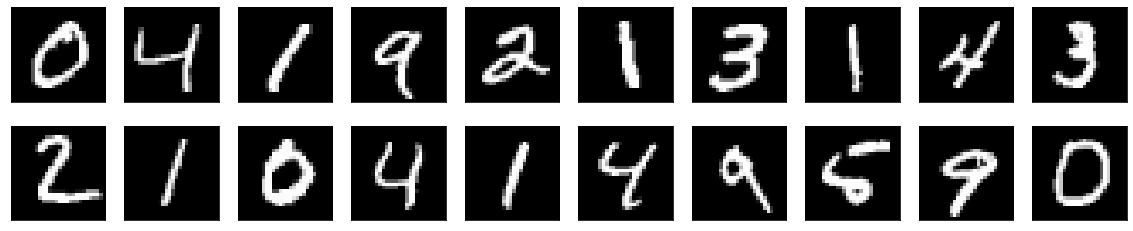

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28                          
input_shape = (img_rows, img_cols, 1)

# the data, shuffled and split between train and test sets
(x_train, _), (x_test, _) = mnist.load_data()
 
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# add random normalization to the trained images i.e; Adding noise using Gaussian Distribution

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

plt.figure(figsize=(20, 4))
for i in range(1,11):
    ax = plt.subplot(2, 10, i)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, 10, i+10)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
def CNN(features_shape, act='relu'):

    # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    # chanDim = -1
    # latentDim = 16
    
    # Encoder
    o = Conv2D(16, (3, 3), activation=act, padding='same', strides=(1,1), name='encoder1')(o)
    o = MaxPooling2D((2, 2), strides=(2,2), padding='same', name='en_pool1')(o)
    o = Conv2D(8, (3, 3), activation=act, padding='same', strides=(1,1), name='encoder2')(o)
    o = MaxPooling2D((2, 2), strides=(2,2), padding='same', name='en_pool2')(o)
    o = Conv2D(8, (3, 3), activation=act, padding='same', strides=(1,1), name='encoder3')(o)
    enc = MaxPooling2D((2, 2), strides=(2,2), padding='same', name='en_pool3')(o)
    
    # Decoder
    o = Conv2D(8, (3, 3), activation=act, padding='same', strides=(1,1), name='decoder1')(enc)
    o = UpSampling2D((2, 2), name='UpSampling1')(o)
    o = Conv2D(8, (3, 3), activation=act, padding='same', strides=(1,1), name='decoder2')(o)
    o = UpSampling2D((2, 2), name='UpSampling2')(o)
    o = Conv2D(16, (3, 3), activation=act, strides=(1,1), name='decoder3')(o)
    o = UpSampling2D((2, 2), name='UpSampling3')(o)
    dec = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same', strides=(1,1), name='decoder4')(o)  
    
    # Print network summary
    Model(inputs=x, outputs=dec).summary()
    
    return Model(inputs=x, outputs=dec)

In [4]:
batch_size = 128
epochs = 100
 
autoencoder = CNN(input_shape, act=LeakyReLU(alpha=0.2))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
 
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) 
H = autoencoder.fit(x_train_noisy, x_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoencoder.predict(x_test_noisy)






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 28, 28, 1)         0         
_________________________________________________________________
encoder1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
en_pool1 (MaxPooling2D)      (None, 14, 14, 16)        0         
_________________________________________________________________
encoder2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
en_pool2 (MaxPooling2D)      (None, 7, 7, 8)           0         
_________________________________________________________________
encoder3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
en_pool3 (MaxPooling2D)      (None, 4, 4, 8)          

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))





Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 7s 118us/step - loss: 0.2652 - val_loss: 0.1943
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1824 - val_loss: 0.1726
Epoch 3/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.1677 - val_loss: 0.1610
Epoch 4/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1587 - val_loss: 0.1536
Epoch 5/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1528 - val_loss: 0.1488
Epoch 6/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1482 - val_loss: 0.1450
Epoch 7/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.1444 - val_loss: 0.1414
Epoch 8/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1414 - val_loss: 0.1388
Epoch 9/100
60000/60000 [==============================] - 5s 75us/step - loss: 0.1390 - val_

Text(0, 0.5, 'Loss')

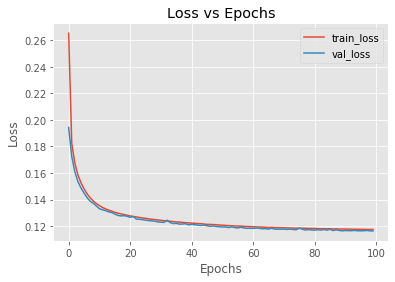

In [5]:
N = np.arange(0,epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label= "train_loss")
plt.plot(N, H.history["val_loss"], label= "val_loss")
plt.legend(loc="upper right")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

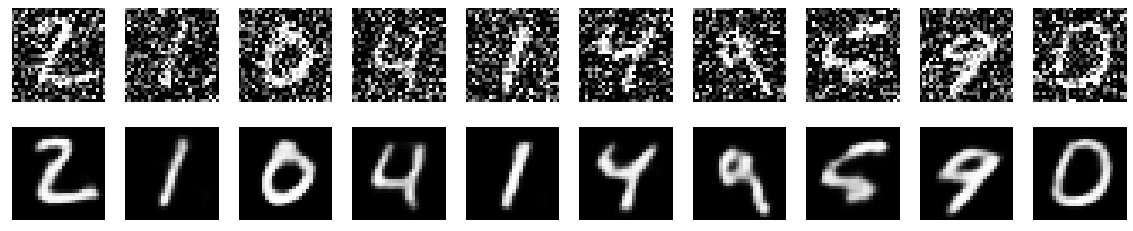

In [6]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()